# Этап 1. Получение данных

Оригинал файла, который используется далее можно найти по ссылке:
https://www.kaggle.com/datasets/shivamb/netflix-shows

In [290]:
import pandas as pd

Прочитаем файл netflix.csv и сохраним его в переменной df.

In [314]:
df = pd.read_csv('netflix.csv', )

Получим первых 10 строк таблицы.

In [315]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Общая информация о данных таблицы df.

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Рассмотрим полученную информацию подробнее.

Всего в таблице 12 столбцов, тип данных object и int64.

Подробно разберём, какие в df столбцы и какую информацию они содержат:

- show_id — идентификатор кино;
- type - тип кино;
- title — название кино;
- director - режиссер;
- cast - актерский состав;
- country - старана, в которой снято кино;
- date_added - дата добавления кино на стриминговый сервис;
- release_year - год релиза;
- rating - ограничения к просмотру;
- duration - продолжительность;
- listed_in - перечислены в категориях;
- description - описание кино. 

Количество значений в столбцах разное.

# Этап 2. Предобработка данных

<b>Мы собираемся</b>:
<ol>
<li>Устранить пропуски в данных</li>
<li>Устранить дубликаты</li>
<li>Отбросить ненужные столбцы</li>
<li>Разделить столбцы</li>  
</ol>

## Работа с пропусками в данных

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [317]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Пустые значения свидетельствуют, что для некоторых фильмов доступна не вся информация. Наибольшее количество пропусков в столбце "director". </br>

Заменим пропущенные значения в столбцах с именем режиссера, актерским составом и ограничениями к просмотру на 'unknown'. После этой операции нужно убедиться, что таблица больше не содержит пропусков.

In [318]:
df['director'] = df['director'].fillna('unknown')

In [319]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [320]:
df['cast'] = df['cast'].fillna('unknown')

In [321]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [322]:
df['rating'] = df['rating'].fillna('unknown')

In [323]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       10
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64

Удаляем в столбцах со страной, датой добавления на стриминговый сервис и продолжительностью пустые значения; убеждаемся, что их больше не осталось.

In [324]:
df.dropna(subset = ['country'], inplace = True)

In [325]:
df.dropna(subset = ['date_added'], inplace = True)

In [326]:
df.dropna(subset = ['duration'], inplace = True)

In [327]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Дополнительно проверим, есть ли в столбцах 'country', 'date_added', 'duration' данные с пустыми строковыми значениями.

In [328]:
df[df['country']=='']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## Устранение дубликатов в данных

Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.

In [329]:
df.duplicated().sum()

0

Дубликаты не обнаружены. Перейдем к следующему пункту.

## Отбрасывание ненужных столбцов

Для анализа данных и последующей визуализации можно исключить некоторые столбцы, которые не повлияют на результат: 
- Актерский состав;
- Описание кино.

In [330]:
df.drop(labels=['cast', 'description'], axis='columns', inplace=True)

In [331]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,s5,TV Show,Kota Factory,unknown,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"


## Разделение столбцов

Для чистой и красивой визуализации данных изменим столбец "country". Сейчас там содержится несколько стран, будем брать оттуда первую, которая, как предполагается, является основной. 

In [332]:
df['country'] = [l[0] for l in df['country'].str.split(',')]

# Этап 3. Визуализация данных

После очистки данных можно использовать датасет для визуализации.

### 1) Посмотрим соотношение типов контента на диаграмме.

In [333]:
content_type=df.groupby('type')['type'].count()

In [334]:
import matplotlib.pyplot as plt
plt.close("all")

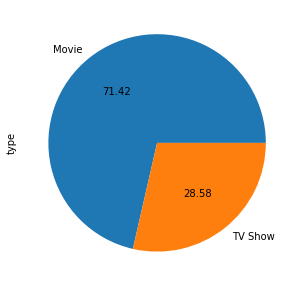

In [335]:
content_type.plot(y='type', kind='pie', autopct="%.2f", figsize=(8, 5))
plt.show()

<b>Вывод:</b> </br>
На графике видно две основные категории кино - фильмы и ТВ-шоу. </br>
Большую часть контента составляют фильмы, которые занимают 71,43%.

### 2) Посмотрим количество фильмов и ТВ-шоу по странам

Для этого сгруппируем значения по странам и типу кино, посчитаем количество в каждой группе и избавимся от уровня группировки, добавив колонки в таблицу.

In [337]:
content_country=df.groupby(['country', 'type'])['type'].count().unstack(level=1)

Посчитаем дополнительно сумму фильмов и ТВ-шоу в каждой стране, отсортируем список по убыванию. Далее удалим столбец с суммой для последующей визуализации.

In [338]:
content_country['sum']=content_country['Movie']+content_country['TV Show']

In [339]:
content_country.head(10)

type,Movie,TV Show,sum
country,,,
,1.0,1.0,2.0
Argentina,56.0,20.0,76.0
Australia,61.0,55.0,116.0
Austria,8.0,1.0,9.0
Bangladesh,3.0,NaN,NaN
Belarus,NaN,1.0,NaN
Belgium,9.0,9.0,18.0
Brazil,56.0,28.0,84.0
Bulgaria,5.0,NaN,NaN


In [340]:
content_country.sort_values('sum', ascending=False, inplace=True)

In [341]:
content_country.drop(columns='sum', inplace=True)

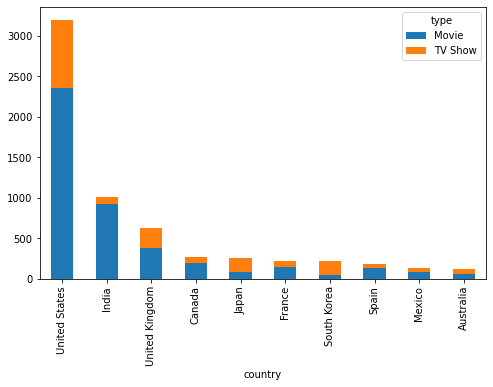

In [342]:
content_country.head(10).plot.bar(stacked=True, figsize=(8, 5))
plt.show()

<b>Вывод:</b> </br>
На графике видем, что США занимает первое место по количеству контента. </br>
В топ-10 странах, приведенных на графике, лишь две страны пускают в прокат на стриминговом сервисе по большей части ТВ-шоу, в остальных сранах лидирующую позицицию занимают фильмы. 

### 3) Посмотрим по годам количество кино, добавленного на стриминговый сервис

Преобразуем тип данных столбца date_added в дату, возьмем от нее год.

In [343]:
pd.to_datetime(df['date_added']).dt.year

0       2021
1       2021
4       2021
7       2021
8       2021
        ... 
8801    2016
8802    2019
8804    2019
8805    2020
8806    2019
Name: date_added, Length: 7964, dtype: int64

Сгруппируем данные по годам, используя предыдущее преобразование.

In [344]:
content_years=df.groupby(pd.to_datetime(df['date_added']).dt.year)['date_added'].count()

In [345]:
content_years

date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      79
2016     408
2017    1122
2018    1530
2019    1858
2020    1771
2021    1140
Name: date_added, dtype: int64

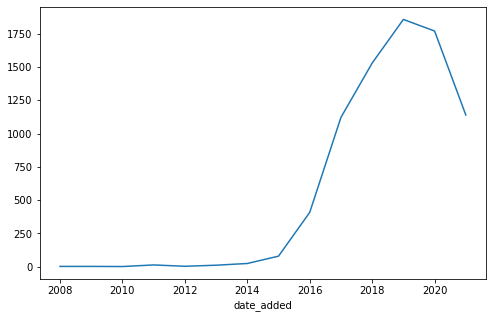

In [347]:
content_years.plot(figsize=(8, 5))
plt.show()

<b>Вывод:</b> </br>
На графике видем, что наибольшее количество фильмов и ТВ-шоу было добавлено в 2019 году </br>

### 4) Посмотрим самые распространенные ограничения к просмотру за все время

In [348]:
content_rating=df.groupby('rating')['rating'].count()

In [349]:
content_rating

rating
G             41
NC-17          3
NR            79
PG           281
PG-13        482
R            788
TV-14       1927
TV-G         190
TV-MA       2929
TV-PG        771
TV-Y         227
TV-Y7        235
TV-Y7-FV       5
UR             3
unknown        3
Name: rating, dtype: int64

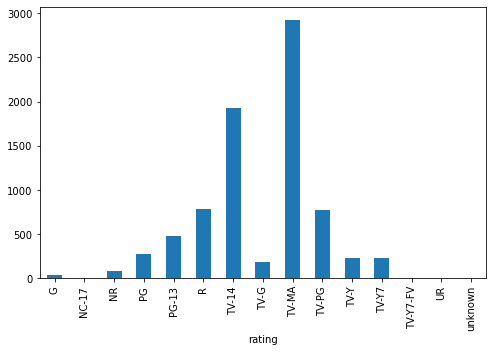

In [350]:
content_rating.plot.bar(figsize=(8, 5))
plt.show()

<b>Вывод:</b> </br>
Можно отметить, что большая часть контента на Netflix имеет рейтинг TV-MA. TV-MA в Соединенных Штатах в соответствии с телевизионными родительскими рекомендациями означает контент для зрелой аудитории. </br>

### 5) Построим график изменения количества контента разных типов на протяжении 2008-2021 года

In [351]:
content_types=df.groupby([pd.to_datetime(df['date_added']).dt.year, 'type'])['type'].count().unstack(level=1)

In [352]:
content_types

type,Movie,TV Show
date_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,5.0
2015,54.0,25.0
2016,242.0,166.0


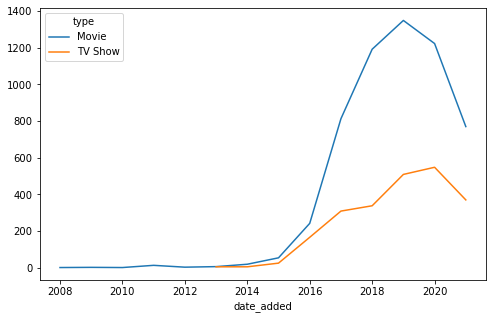

In [353]:
content_types.plot(figsize=(8, 5))
plt.show()

<b>Вывод:</b> </br>
Эта линейная диаграмма сравнивает количество фильмов и телешоу, добавленных на стриминговый сервис с 2008 по 2021 год.</br>
Мы видим, что фильмы добавлялись каждый год, их количество всегда больше или равно количеству ТВ-шоу.</br>
Причем первые 5 лет на сервис добавлялись только фильмы.